<a href="https://colab.research.google.com/github/veenath09/Simple-neural-network-single-perceptron-/blob/main/classification_in_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd

from sklearn.datasets import make_blobs

np.random.seed(3)

Text(0.5, 1.0, 'classification')

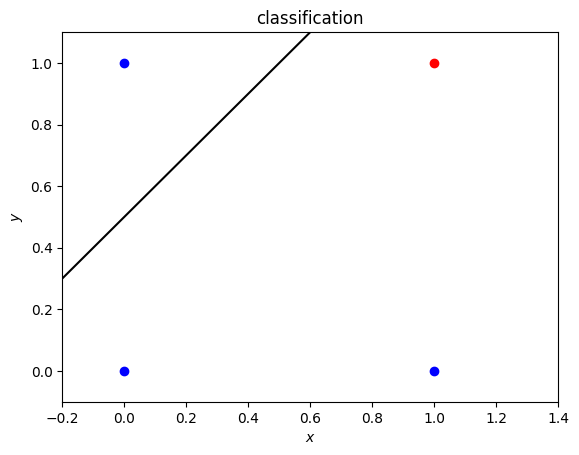

In [ ]:
fig,ax = plt.subplots()
min,max = -0.2,1.4
x_line  = np.arange(min,max,0.1)
ax.plot(x_line, x_line + 0.5, color="black");

#data points
ax.scatter(1,1,color='r')
ax.scatter(0,0,color='b')
ax.scatter(1,0,color='b')
ax.scatter(0,1,color='b')
ax.set_xlim([min,max])
ax.set_ylim([-0.1,1.1])
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
plt.title("classification")


[]

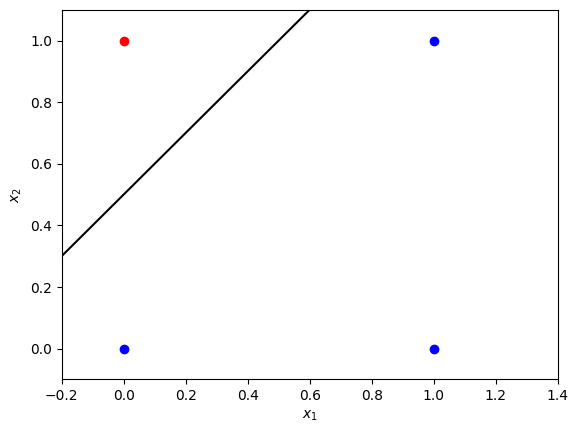

In [ ]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
x_line = np.arange(xmin, xmax, 0.1)
# Data points (observations) from two classes.
ax.scatter(0, 0, color="b")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="b")
ax.scatter(1, 1, color="b")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
# One of the lines which can be used as a decision boundary to separate two classes.
ax.plot(x_line, x_line + 0.5, color="black")
plt.plot()

In [ ]:
m=30
X = np.random.randint(0, 2, (2, m))
Y = np.logical_and(X[0] == 0, X[1] == 1).astype(int).reshape((1, m))



(30,)

In [ ]:
def sigmoid(z):
  sigmoid = 1/(1+np.exp(-z))

  return sigmoid
print("sigmoid(-2) = " + str(sigmoid(-2)))
print("sigmoid(0) = " + str(sigmoid(0)))
print("sigmoid(3.5) = " + str(sigmoid(3.5)))

sigmoid(-2) = 0.11920292202211755
sigmoid(0) = 0.5
sigmoid(3.5) = 0.9706877692486436


In [ ]:
print(sigmoid(np.array([-2, 0, 3.5])))

[0.11920292 0.5        0.97068777]


In [ ]:
def  define_layers(X,Y):
  x_l = X.shape[0]
  y_l = Y.shape[0]

  return (x_l,y_l)

n_x =define_layers(X,Y)[0]
n_y =define_layers(X,Y)[1]

In [ ]:
def set_params(n_x,n_y):
  w = np.random.randn(n_y,n_x)*0.01

  b = np.zeros((n_y, 1))

  parameters = {
                  "W":w,
                  "b":b
  }
  return parameters

parameters = set_params(n_x,n_y)
w = parameters["W"]
w

array([[0.00091035, 0.00785432]])

In [ ]:
def forward_propagation(X,parameters):
  w = parameters["W"]
  b = parameters["b"]

  Z = np.matmul(w,X)+b

  Y_hat = sigmoid(Z)

  return Y_hat

y_hat = forward_propagation(X,parameters)
y_hat

array([[0.5       , 0.50219115, 0.50196357, 0.5       , 0.5       ,
        0.50022759, 0.5       , 0.50196357, 0.50196357, 0.5       ,
        0.50219115, 0.50196357, 0.5       , 0.50219115, 0.50219115,
        0.50196357, 0.5       , 0.50219115, 0.50022759, 0.50022759,
        0.50196357, 0.50196357, 0.50219115, 0.50219115, 0.5       ,
        0.50022759, 0.50196357, 0.50022759, 0.50196357, 0.50219115]])

In [ ]:
def loss_func(Y,y_hat):
  m = Y.shape[1]
  # print(f"the shape of yhat is {np.log(y_hat).shape} and the shape of Y is {Y.shape}")
  # print(f"the values of multiplyis {(np.multiply(np.log(y_hat),Y)).shape}")
  logprobs = - np.multiply(np.log(y_hat),Y) - np.multiply(np.log(1 - y_hat),1 - Y)
  cost = 1/m * np.sum(logprobs)

  return cost

print("cost = " + str(loss_func(Y,y_hat)))

cost = 0.6932184079141135


In [ ]:
def backword_propagation(X,Y,y_hat):
  m = X.shape[1]
  dZ = y_hat - Y
  dw = 1/m*np.dot(dZ,X.T)
  db = 1/m*np.sum(dZ, axis=1 , keepdims=True)

  grad = {
            "dw": dw,
            "db": db
  }

  return grad

grad = backword_propagation(X, Y,y_hat)

print("dW = " + str(grad["dw"]))
print("db = " + str(grad["db"]))

dW = [[ 0.21728891 -0.01549329]]
db = [[0.20121131]]


In [ ]:
def backward_propagation(A, X, Y):
    """
    Implements the backward propagation, calculating gradients

    Arguments:
    A -- the output of the neural network of shape (n_y, number of examples)
    X -- input data of shape (n_x, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)

    Returns:
    grads -- python dictionary containing gradients with respect to different parameters
    """
    m = X.shape[1]

    # Backward propagation: calculate partial derivatives denoted as dW, db for simplicity.
    dZ = A - Y
    dW = 1/m * np.dot(dZ, X.T)
    db = 1/m * np.sum(dZ, axis = 1, keepdims = True)

    grads = {"dW": dW,
             "db": db}

    return grads

grads = backward_propagation(y_hat, X, Y)

print("dW = " + str(grads["dW"]))
print("db = " + str(grads["db"]))

dW = [[ 0.21728891 -0.01549329]]
db = [[0.20121131]]


In [ ]:
def update_params(parameters,grad,learning_rate=1.2):
  w = parameters["W"]
  b = parameters["b"]

  dw = grad["dw"]
  db = grad['db']

  w = w - learning_rate*dw
  b = b - learning_rate*db

  parameters = {
                  "W":w,
                  "b":b
  }

  return parameters

parameters = update_params(parameters,grad,learning_rate=1.2)
parameters




{'W': array([[-5.46714078,  0.40629952]]), 'b': array([[-5.070525]])}

In [ ]:
def nn_model(X,Y,iterations=20, print_cost=False):
  n_x =define_layers(X,Y)[0]
  n_y =define_layers(X,Y)[1]

  parameters=set_params(n_x,n_y)

  for i in range(iterations):
    y_hat=forward_propagation(X,parameters)
    cost = loss_func(Y,y_hat)
    grad=backword_propagation(X,Y,y_hat)
    parameters = update_params(parameters,grad,learning_rate=1.2)

    if print_cost:
      print(f"the cost after {i}th iteration is {cost}")

  return parameters



In [ ]:
parameters = nn_model(X,Y,iterations=50,print_cost=True)
parameters

the cost after 0th iteration is 0.6943933713275628
the cost after 1th iteration is 0.6079996310251964
the cost after 2th iteration is 0.5594450982802407
the cost after 3th iteration is 0.5236734575743669
the cost after 4th iteration is 0.4938287029146575
the cost after 5th iteration is 0.46769572131140597
the cost after 6th iteration is 0.4443582993604936
the cost after 7th iteration is 0.4233157127702819
the cost after 8th iteration is 0.40422590021269944
the cost after 9th iteration is 0.3868239110227585
the cost after 10th iteration is 0.3708927128210257
the cost after 11th iteration is 0.35625045299020147
the cost after 12th iteration is 0.34274327788753284
the cost after 13th iteration is 0.3302403340117835
the cost after 14th iteration is 0.31862987302801987
the cost after 15th iteration is 0.30781608186763276
the cost after 16th iteration is 0.29771646998635987
the cost after 17th iteration is 0.28825971118634863
the cost after 18th iteration is 0.2793838614882788
the cost after

{'W': array([[-3.60629052,  3.1270489 ]]), 'b': array([[-1.67363465]])}

In [ ]:
X_pred = make_blobs(n_samples=100,n_features=2,random_state=1)
X_pred



(array([[-7.94152277e-01,  2.10495117e+00],
        [-9.15155186e+00, -4.81286449e+00],
        [-1.14418263e+01, -4.45781441e+00],
        [-9.76761777e+00, -3.19133737e+00],
        [-4.53655648e+00, -8.40186288e+00],
        [-6.26302115e+00, -8.10666081e+00],
        [-6.38481234e+00, -8.47302970e+00],
        [-9.20490564e+00, -4.57687928e+00],
        [-2.76017908e+00,  5.55121358e+00],
        [-1.17104176e+00,  4.33091816e+00],
        [-1.00364080e+01, -5.56912090e+00],
        [-9.87589123e+00, -2.82386464e+00],
        [-7.17532921e+00, -8.77059017e+00],
        [-2.40671820e+00,  6.09894447e+00],
        [-4.87418245e+00, -1.00495890e+01],
        [-6.07854700e+00, -7.93969420e+00],
        [-6.83238762e+00, -7.47067670e+00],
        [-2.34673261e+00,  3.56128423e+00],
        [-1.03415662e+01, -3.90975169e+00],
        [-1.10926243e+01, -3.78396611e+00],
        [-6.50212109e+00, -7.91249101e+00],
        [-1.02639310e+01, -3.92073400e+00],
        [-6.81608302e+00, -8.449

In [ ]:
def predict(X, parameters):
    """
    Using the learned parameters, predicts a class for each example in X

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)

    Returns
    predictions -- vector of predictions of our model (blue: False / red: True)
    """

    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A = forward_propagation(X, parameters)
    predictions = A > 0.5
    print(f"the predictions are {predictions}")

    return predictions

X_pred = np.array([[1, 1, 0, 0,0],
                   [0, 1, 0, 1,0.6]])
Y_pred = predict(X_pred, parameters)

print(f"Coordinates (in the columns):\n{X_pred}")
print(f"Predictions:\n{Y_pred}")

the predictions are [[False False False  True  True]]
Coordinates (in the columns):
[[1.  1.  0.  0.  0. ]
 [0.  1.  0.  1.  0.6]]
Predictions:
[[False False False  True  True]]


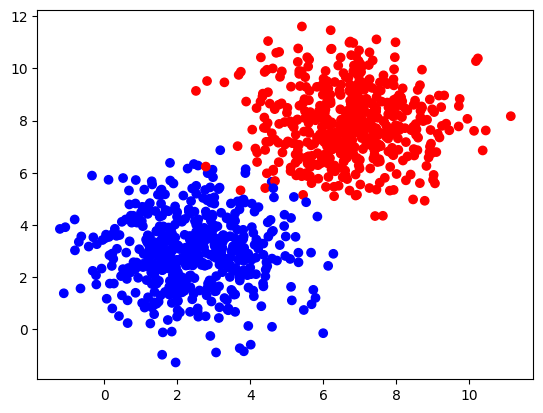

In [ ]:
# Dataset
n_samples = 1000
samples, labels = make_blobs(n_samples=n_samples,
                             centers=([2.5, 3], [6.7, 7.9]),
                             cluster_std=1.4,
                             random_state=0)

X_larger = np.transpose(samples)
Y_larger = labels.reshape((1,n_samples))

plt.scatter(X_larger[0, :], X_larger[1, :], c=Y_larger, cmap=colors.ListedColormap(['blue', 'red']));

In [ ]:
samples.shape

(1000, 2)

In [ ]:
y

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,